In [1]:
import pandas as pd 
import numpy as np


In [2]:
df = pd.read_csv('spam.csv', encoding='latin-1')

In [3]:
# Check the dimensions of the DataFrame
print("Shape:", df.shape)

# View the column names and data types
print("Columns and Data Types:")
print(df.dtypes)


Shape: (5572, 5)
Columns and Data Types:
v1            object
v2            object
Unnamed: 2    object
Unnamed: 3    object
Unnamed: 4    object
dtype: object


In [4]:
# Display the first few rows of the DataFrame
df.head()

v1                                                 v2 Unnamed: 2  \
0   ham  Go until jurong point, crazy.. Available only ...        NaN   
1   ham                      Ok lar... Joking wif u oni...        NaN   
2  spam  Free entry in 2 a wkly comp to win FA Cup fina...        NaN   
3   ham  U dun say so early hor... U c already then say...        NaN   
4   ham  Nah I don't think he goes to usf, he lives aro...        NaN   

  Unnamed: 3 Unnamed: 4  
0        NaN        NaN  
1        NaN        NaN  
2        NaN        NaN  
3        NaN        NaN  
4        NaN        NaN

In [5]:
df.shape

(5572, 5)

In [6]:
# drop last 3 cols
df.drop(columns=['Unnamed: 2','Unnamed: 3','Unnamed: 4'],inplace=True)

In [7]:
# renaming the cols
df.rename(columns={'v1':'target','v2':'text'},inplace=True)
df.sample(5)

target                                               text
4580    ham  Not course. Only maths one day one chapter wit...
1647    ham  Evening * v good if somewhat event laden. Will...
3386    ham                       So u workin overtime nigpun?
4507    ham                           Not able to do anything.
1795    ham  I hope your alright babe? I worry that you mig...

In [8]:
# Check for missing values
print("Missing Values:")
print(df.isnull().sum())

Missing Values:
target    0
text      0
dtype: int64


In [9]:
from sklearn.preprocessing import LabelEncoder
encoder = LabelEncoder()

In [10]:
df['target'] = encoder.fit_transform(df['target'])

In [11]:
df.head()

target                                               text
0       0  Go until jurong point, crazy.. Available only ...
1       0                      Ok lar... Joking wif u oni...
2       1  Free entry in 2 a wkly comp to win FA Cup fina...
3       0  U dun say so early hor... U c already then say...
4       0  Nah I don't think he goes to usf, he lives aro...

In [12]:
# check for duplicate values
df.duplicated().sum()

403

In [13]:
# remove duplicates
df = df.drop_duplicates(keep='first')

In [14]:
df.shape

(5169, 2)

### EDA

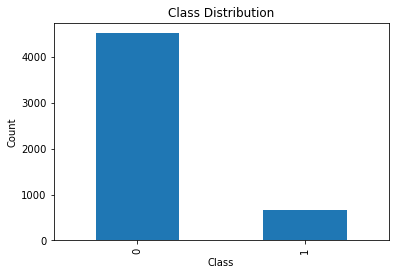

In [15]:
import matplotlib.pyplot as plt

# Count the number of instances for each class
class_counts = df['target'].value_counts()

# Plot the class distribution
plt.figure(figsize=(6, 4))
class_counts.plot(kind='bar')
plt.xlabel('Class')
plt.ylabel('Count')
plt.title('Class Distribution')
plt.show()


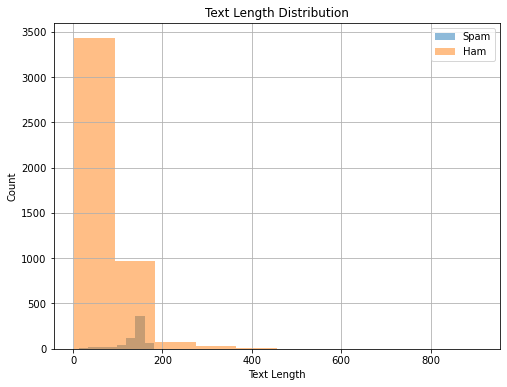

In [16]:
# Calculate the length of each text message
df['text_length'] = df['text'].apply(lambda x: len(x))

# Plot the text length distribution for each class
plt.figure(figsize=(8, 6))
df[df['target'] == 1]['text_length'].hist(alpha=0.5, label='Spam')
df[df['target'] == 0]['text_length'].hist(alpha=0.5, label='Ham')
plt.xlabel('Text Length')
plt.ylabel('Count')
plt.title('Text Length Distribution')
plt.legend()
plt.show()


In [17]:
df.head()

target                                               text  text_length
0       0  Go until jurong point, crazy.. Available only ...          111
1       0                      Ok lar... Joking wif u oni...           29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...          155
3       0  U dun say so early hor... U c already then say...           49
4       0  Nah I don't think he goes to usf, he lives aro...           61

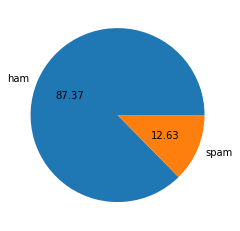

In [18]:
import matplotlib.pyplot as plt
plt.pie(df['target'].value_counts(), labels=['ham','spam'],autopct="%0.2f")
plt.show()

In [19]:
import nltk

In [20]:
nltk.download('punkt')

[nltk_data] Downloading package punkt to C:\Users\no
[nltk_data]     name\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt is already up-to-date!


True

In [21]:
df['num_characters'] = df['text'].apply(len)

In [22]:
df.head()

target                                               text  text_length  \
0       0  Go until jurong point, crazy.. Available only ...          111   
1       0                      Ok lar... Joking wif u oni...           29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...          155   
3       0  U dun say so early hor... U c already then say...           49   
4       0  Nah I don't think he goes to usf, he lives aro...           61   

   num_characters  
0             111  
1              29  
2             155  
3              49  
4              61

In [23]:
df.drop(columns=['text_length'], inplace=True)

In [24]:
df.head()

target                                               text  num_characters
0       0  Go until jurong point, crazy.. Available only ...             111
1       0                      Ok lar... Joking wif u oni...              29
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155
3       0  U dun say so early hor... U c already then say...              49
4       0  Nah I don't think he goes to usf, he lives aro...              61

In [25]:
df['num_words']=df['text'].apply(lambda x:len(nltk.word_tokenize(x)))

In [26]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  
0         24  
1          8  
2         37  
3         13  
4         15

In [27]:
df["num_sentences"]=df['text'].apply(lambda x:len(nltk.sent_tokenize(x)))

In [28]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences  
0         24              2  
1          8              2  
2         37              2  
3         13              1  
4         15              1

In [29]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

In [30]:
df['target'].value_counts()

0    4516
1     653
Name: target, dtype: int64

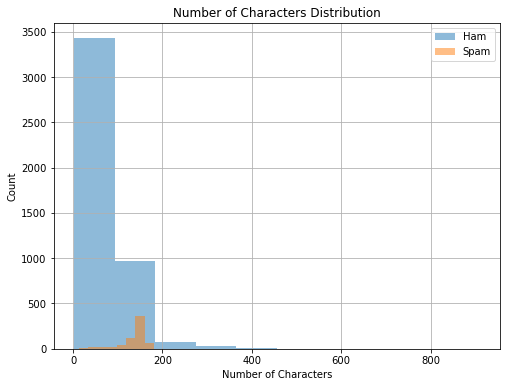

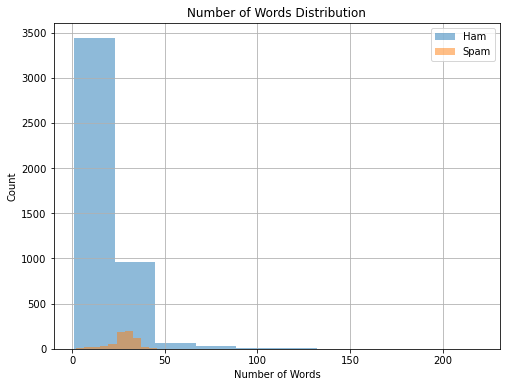

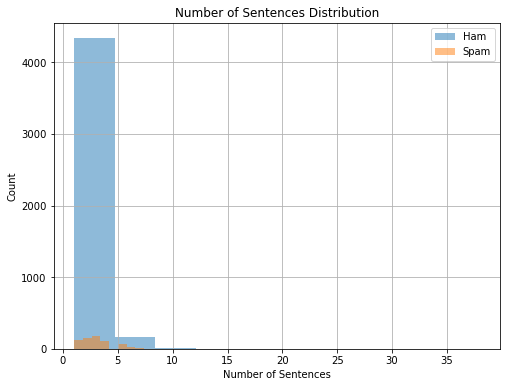

In [31]:
import matplotlib.pyplot as plt

# Distribution of text length
plt.figure(figsize=(8, 6))
df[df['target'] == 0]['num_characters'].hist(alpha=0.5, label='Ham')
df[df['target'] == 1]['num_characters'].hist(alpha=0.5, label='Spam')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.title('Number of Characters Distribution')
plt.legend()
plt.show()

# Distribution of number of words
plt.figure(figsize=(8, 6))
df[df['target'] == 0]['num_words'].hist(alpha=0.5, label='Ham')
df[df['target'] == 1]['num_words'].hist(alpha=0.5, label='Spam')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Number of Words Distribution')
plt.legend()
plt.show()

# Distribution of number of sentences
plt.figure(figsize=(8, 6))
df[df['target'] == 0]['num_sentences'].hist(alpha=0.5, label='Ham')
df[df['target'] == 1]['num_sentences'].hist(alpha=0.5, label='Spam')
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.title('Number of Sentences Distribution')
plt.legend()
plt.show()


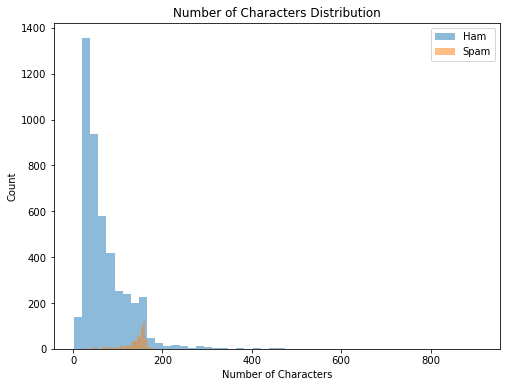

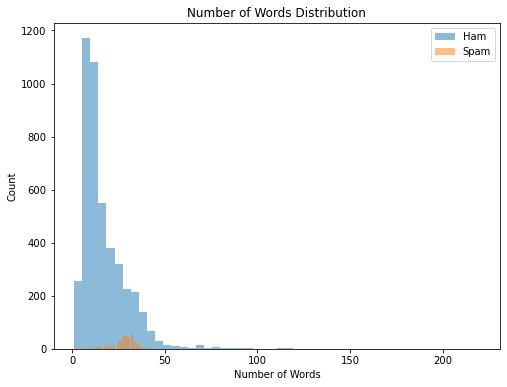

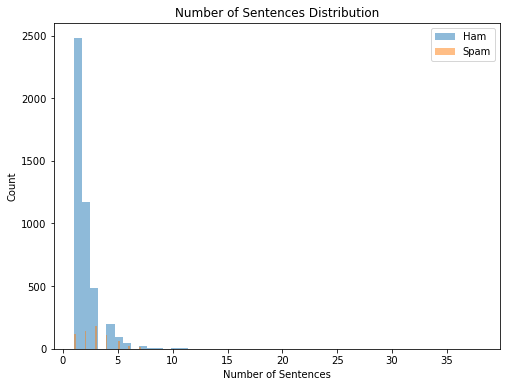

In [32]:
import matplotlib.pyplot as plt

# Distribution of number of characters
plt.figure(figsize=(8, 6))
plt.hist(df[df['target'] == 0]['num_characters'], bins=50, alpha=0.5, label='Ham')
plt.hist(df[df['target'] == 1]['num_characters'], bins=50, alpha=0.5, label='Spam')
plt.xlabel('Number of Characters')
plt.ylabel('Count')
plt.title('Number of Characters Distribution')
plt.legend()
plt.show()

# Distribution of number of words
plt.figure(figsize=(8, 6))
plt.hist(df[df['target'] == 0]['num_words'], bins=50, alpha=0.5, label='Ham')
plt.hist(df[df['target'] == 1]['num_words'], bins=50, alpha=0.5, label='Spam')
plt.xlabel('Number of Words')
plt.ylabel('Count')
plt.title('Number of Words Distribution')
plt.legend()
plt.show()

# Distribution of number of sentences
plt.figure(figsize=(8, 6))
plt.hist(df[df['target'] == 0]['num_sentences'], bins=50, alpha=0.5, label='Ham')
plt.hist(df[df['target'] == 1]['num_sentences'], bins=50, alpha=0.5, label='Spam')
plt.xlabel('Number of Sentences')
plt.ylabel('Count')
plt.title('Number of Sentences Distribution')
plt.legend()
plt.show()


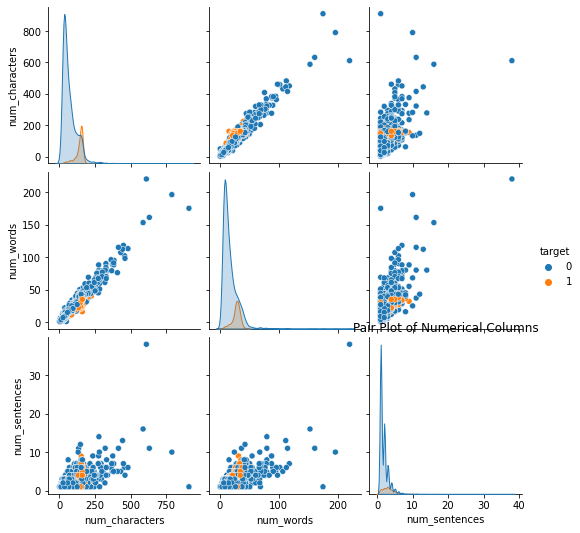

In [33]:
import seaborn as sns

# Select the numerical columns for the pair plot
numerical_columns = ['num_characters', 'num_words', 'num_sentences']

# Create a pair plot
sns.pairplot(df, vars=numerical_columns, hue='target')
plt.title('Pair Plot of Numerical Columns')
plt.show()


In [34]:
import numpy as np

# Calculate statistics for spam messages
spam_stats = df[df['target'] == 0]['num_words'].describe()
spam_mean = spam_stats['mean']
spam_count = spam_stats['count']

# Calculate statistics for ham messages
ham_stats = df[df['target'] == 1]['num_words'].describe()
ham_mean = ham_stats['mean']
ham_count = ham_stats['count']

# Print the statistics
print("Spam Statistics:")
print("Mean number of words:", spam_mean)
print("Total count:", spam_count)
print()
print("Ham Statistics:")
print("Mean number of words:", ham_mean)
print("Total count:", ham_count)


Spam Statistics:
Mean number of words: 17.12333923826395
Total count: 4516.0

Ham Statistics:
Mean number of words: 27.6676875957121
Total count: 653.0


In [35]:
df.columns

Index(['target', 'text', 'num_characters', 'num_words', 'num_sentences'], dtype='object')

### Data Preprocessing

In [36]:
import nltk
from nltk.corpus import stopwords
from nltk.stem import PorterStemmer
import string

def transform_text(text):
    text = text.lower()
    text = nltk.word_tokenize(text)
    
    y = []
    for i in text:
        if i.isalnum():
            y.append(i)
    
    text = y[:]
    y.clear()
    
    for i in text:
        if i not in stopwords.words('english') and i not in string.punctuation:
            y.append(i)
            
    text = y[:]
    y.clear()
    
    ps = PorterStemmer()
    
    for i in text:
        y.append(ps.stem(i))
    
    return " ".join(y)


In [37]:
text = "I'm gonna be home soon and i don't want to talk about this stuff anymore tonight, k? I've cried enough today."
preprocessed_text = transform_text(text)
print(preprocessed_text)


gon na home soon want talk stuff anymor tonight k cri enough today


In [38]:
df['transformed_text']=df['text'].apply(transform_text)

In [39]:
df.head()

target                                               text  num_characters  \
0       0  Go until jurong point, crazy.. Available only ...             111   
1       0                      Ok lar... Joking wif u oni...              29   
2       1  Free entry in 2 a wkly comp to win FA Cup fina...             155   
3       0  U dun say so early hor... U c already then say...              49   
4       0  Nah I don't think he goes to usf, he lives aro...              61   

   num_words  num_sentences                                   transformed_text  
0         24              2  go jurong point crazi avail bugi n great world...  
1          8              2                              ok lar joke wif u oni  
2         37              2  free entri 2 wkli comp win fa cup final tkt 21...  
3         13              1                u dun say earli hor u c alreadi say  
4         15              1               nah think goe usf live around though

In [40]:
spam_corpus=[]
for msg in df[df['target'] ==1]['transformed_text'].tolist():
    for word in msg.split():
        spam_corpus.append(word)
    

In [41]:
len(spam_corpus)

9939

C:\Users\no name\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


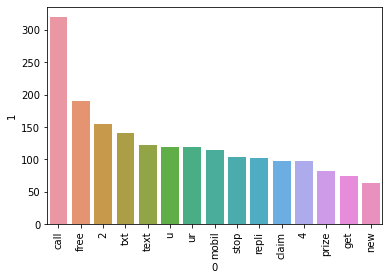

In [42]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(spam_corpus).most_common(15))[0],pd.DataFrame(Counter(spam_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

In [43]:
ham_corpus = []
for msg in df[df['target'] == 0]['transformed_text'].tolist():
    for word in msg.split():
        ham_corpus.append(word)

In [44]:
len(ham_corpus)

35402

C:\Users\no name\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


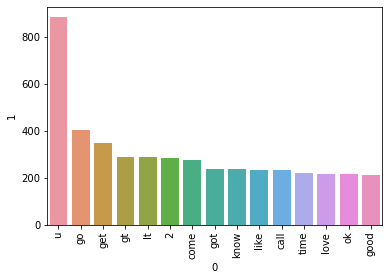

In [45]:
from collections import Counter
sns.barplot(pd.DataFrame(Counter(ham_corpus).most_common(15))[0],pd.DataFrame(Counter(ham_corpus).most_common(30))[1])
plt.xticks(rotation='vertical')
plt.show()

## 4. Model Building

In [46]:
from sklearn.feature_extraction.text import CountVectorizer,TfidfVectorizer
cv = CountVectorizer()
tfidf = TfidfVectorizer(max_features=3500)

In [47]:
X = tfidf.fit_transform(df['transformed_text']).toarray()

In [48]:
y = df['target'].values

In [49]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=2)


In [50]:
from sklearn.naive_bayes import MultinomialNB, BernoulliNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from xgboost import XGBClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score

# Naive Bayes models
multinomial_nb = MultinomialNB()
bernoulli_nb = BernoulliNB()

# Random Forest model
random_forest = RandomForestClassifier()

# Logistic Regression model
logistic_regression = LogisticRegression()

# XGBoost model
xgb = XGBClassifier()

# Fit the models on the training data
multinomial_nb.fit(X_train, y_train)
bernoulli_nb.fit(X_train, y_train)
random_forest.fit(X_train, y_train)
logistic_regression.fit(X_train, y_train)
xgb.fit(X_train, y_train)

# Make predictions on the testing data
nb_pred = multinomial_nb.predict(X_test)
rf_pred = random_forest.predict(X_test)
lr_pred = logistic_regression.predict(X_test)
xgb_pred = xgb.predict(X_test)

# Calculate evaluation metrics for each model
nb_accuracy = accuracy_score(y_test, nb_pred)
nb_precision = precision_score(y_test, nb_pred)
nb_recall = recall_score(y_test, nb_pred)
nb_f1_score = f1_score(y_test, nb_pred)

rf_accuracy = accuracy_score(y_test, rf_pred)
rf_precision = precision_score(y_test, rf_pred)
rf_recall = recall_score(y_test, rf_pred)
rf_f1_score = f1_score(y_test, rf_pred)

lr_accuracy = accuracy_score(y_test, lr_pred)
lr_precision = precision_score(y_test, lr_pred)
lr_recall = recall_score(y_test, lr_pred)
lr_f1_score = f1_score(y_test, lr_pred)

xgb_accuracy = accuracy_score(y_test, xgb_pred)
xgb_precision = precision_score(y_test, xgb_pred)
xgb_recall = recall_score(y_test, xgb_pred)
xgb_f1_score = f1_score(y_test, xgb_pred)

# Print the evaluation metrics for each model
print("Naive Bayes:")
print("Accuracy:", nb_accuracy)
print("Precision:", nb_precision)
print("Recall:", nb_recall)
print("F1 Score:", nb_f1_score)
print()

print("Random Forest:")
print("Accuracy:", rf_accuracy)
print("Precision:", rf_precision)
print("Recall:", rf_recall)
print("F1 Score:", rf_f1_score)
print()

print("Logistic Regression:")
print("Accuracy:", lr_accuracy)
print("Precision:", lr_precision)
print("Recall:", lr_recall)
print("F1 Score:", lr_f1_score)
print()

print("XGBoost:")
print("Accuracy:", xgb_accuracy)
print("Precision:", xgb_precision)
print("Recall:", xgb_recall)
print("F1 Score:", xgb_f1_score)


Naive Bayes:
Accuracy: 0.9709864603481625
Precision: 1.0
Recall: 0.782608695652174
F1 Score: 0.878048780487805

Random Forest:
Accuracy: 0.9758220502901354
Precision: 0.9829059829059829
Recall: 0.8333333333333334
F1 Score: 0.9019607843137254

Logistic Regression:
Accuracy: 0.9564796905222437
Precision: 0.979381443298969
Recall: 0.6884057971014492
F1 Score: 0.8085106382978722

XGBoost:
Accuracy: 0.971953578336557
Precision: 0.936
Recall: 0.8478260869565217
F1 Score: 0.8897338403041825


In [51]:
import pandas as pd

# Create a dictionary to store the scores for each classifier
scores = {
    'Classifier': ['Naive Bayes', 'Random Forest', 'Logistic Regression', 'XGBoost'],
    'Accuracy': [0.9709864603481625, 0.9777562862669246, 0.9564796905222437, 0.971953578336557],
    'Precision': [1.0, 0.9831932773109243, 0.979381443298969, 0.936],
    'Recall': [0.782608695652174, 0.8478260869565217, 0.6884057971014492, 0.8478260869565217],
    'F1 Score': [0.878048780487805, 0.9105058365758756, 0.8085106382978722, 0.8897338403041825]
}

# Create a DataFrame from the scores dictionary
scores_df = pd.DataFrame(scores)

# Print the scores DataFrame
scores_df


Classifier  Accuracy  Precision    Recall  F1 Score
0          Naive Bayes  0.970986   1.000000  0.782609  0.878049
1        Random Forest  0.977756   0.983193  0.847826  0.910506
2  Logistic Regression  0.956480   0.979381  0.688406  0.808511
3              XGBoost  0.971954   0.936000  0.847826  0.889734

In [53]:
import pickle
pickle.dump(tfidf, open("vectorizer.pkl","wb"))
pickle.dump(multinomial_nb,open("model.pkl","wb"))